In [1]:
import tensorflow as tf
import IPython.display as display
import os
import pandas as pd
import numpy as np
import imghdr
import glob
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Example image:

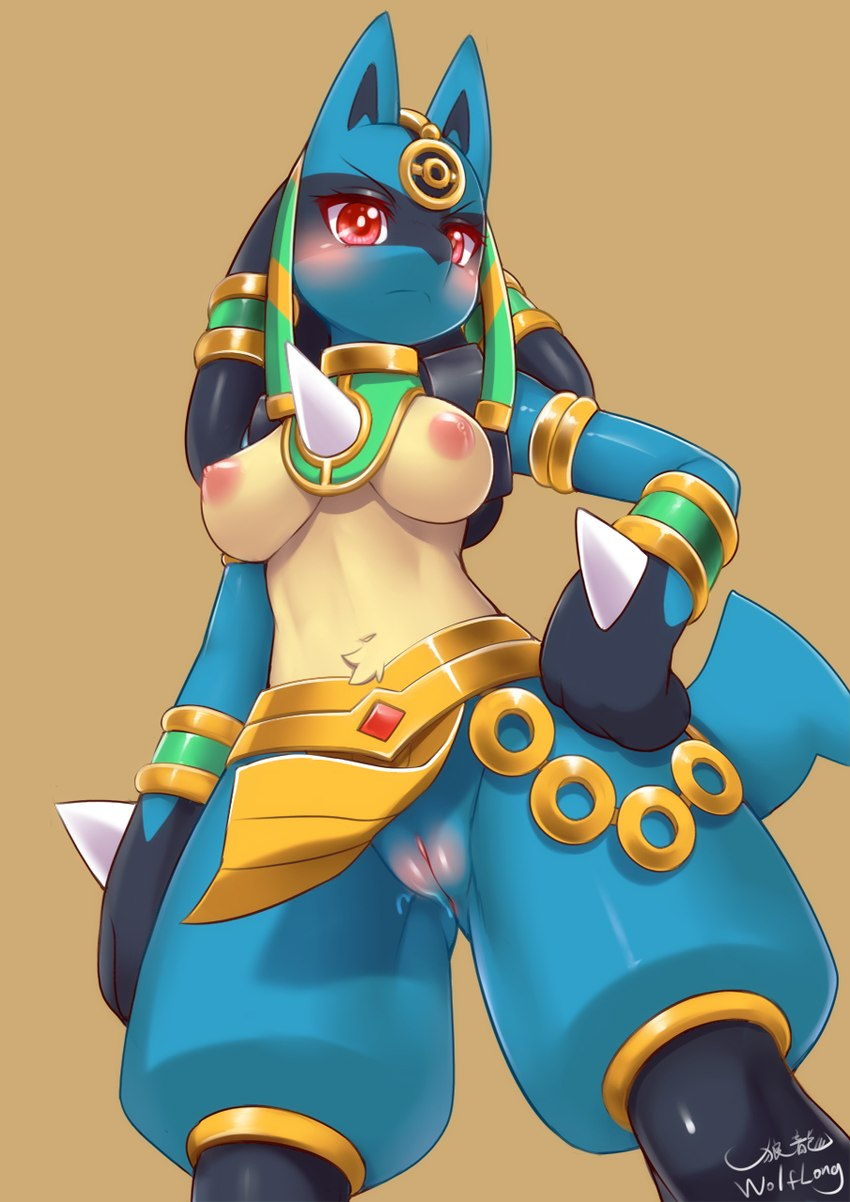

In [2]:
image_path = "./horny_pics/wolflong/wolflong_post_3232856.jpg"
display.display(display.Image(image_path))

In [3]:
img_raw = tf.io.read_file(image_path)
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(1202, 850, 3)
<dtype: 'uint8'>


In [4]:
img_final = tf.image.resize(img_tensor, [512, 512])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(512, 512, 3)
0.0
1.0


Text(0.5, 1.0, './horny_pics/wolflong/wolflong_post_3232856.jpg')

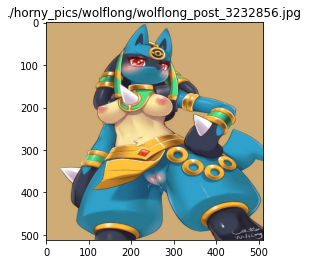

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img_final)
plt.title(image_path)

Make a handy function for pre-pro.

In [6]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [512,512])
  image /= 255.0  # normalize to [0,1] range

  return image

In [7]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

Let's see some example by using the pre-pro, here we will be only using 10 from each artist,
but before that, we have some broken image file(Flash were no longer supported, and it will break the code)

In [8]:
import PIL


from PIL import Image
from PIL import UnidentifiedImageError

try:
    gif = Image.open('horny_pics\wolflong\wolflong_post_1344567.jpg')
except PIL.UnidentifiedImageError:
    print("This was a flash file.")
else:
    print("JPG file.")

# make it into a function

def broken_jpg(img_path):
    """
    img_path: it takes an image path, read it and checking the type
    Return True if it is broken.
    """
    try:
        gif = Image.open(img_path)
    except PIL.UnidentifiedImageError:
        return True
    else:
        # check if the img is a gif converted to jpg
        try:
            gif.seek(1)
        except EOFError:
            return False
        else:
            return True
        # I prob don't need this next return
        return False



This was a flash file.


In [9]:
rootdir =  os.path.dirname(os.path.abspath("ANN_Example.ipynb"))
print("This is the roodir: ", rootdir)


file_list = []

for subdir, dirs, files in os.walk(rootdir):
    lim = 0
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        # skip the broken file
        if broken_jpg(filepath):
            continue
        else:
                    # we only want 10 from each
            if lim == 10:
                break

            if filepath.endswith(".jpg"):
                print(filepath)
                file_list.append(filepath)
                lim +=1
print(file_list )

This is the roodir:  S:\E621\E621_ANN
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_106588.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1108218.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1116672.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1124348.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212250.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212260.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1212264.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1213324.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_121661.jpg
S:\E621\E621_ANN\horny_pics\skykain\skykain_post_1250236.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1001846.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1005914.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1005917.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1023560.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1043252.jpg
S:\E621\E621_ANN\horny_pics\wolflong\wo

In [10]:
# This cell is for debug
# S:\E621\E621_ANN\horny_pics\wolflong\wolflong_post_1032879.jpg
# this image has issue, will break the following code
# InvalidArgumentError: Got 6 frames, but animated gifs can only be decoded by tf.io.decode_gif or tf.io.decode_image [Op:DecodeJpeg]
# fixed by using broken_jpg()


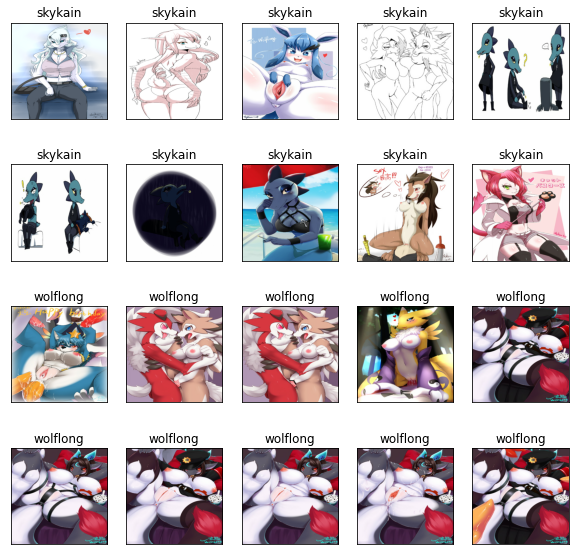

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
    img_path = file_list[i]
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(load_and_preprocess_image(img_path))
    #print(img_path.split(sep="\\"))
    plt.title(img_path.split(sep="\\")[-2])

plt.show()

In [12]:
# save the method to a function for loading our data!

    
def data_loader(printing=False):
    """
    param:
    printing:
        Will print Message
    This function will loop through the subdir and find all working JPG files
    Store it as img file to X, artist name in y
    return a Tuple, (X,y) or frame
    """
    
    X ,y = [],[]

    rootdir =  os.path.dirname(os.path.abspath("ANN_Example.ipynb"))
    for subdir, dirs, files in os.walk(rootdir):

        for file in files:
            filepath = subdir + os.sep + file
            # skip the broken file
            if broken_jpg(filepath):
                continue
            else:
                if filepath.endswith(".jpg"):

                    X.append(load_and_preprocess_image(filepath))
                    img_name = file.split(sep="_")[-1]
                    arti_name = file.split(sep="_")[0]
                    y.append(arti_name)
                
                        
                    if printing:
                        print("Loaded art: {}, Artist: {}".format(img_name,arti_name))
    X = np.array(X)
    y = np.array(y)

    print("X.shape: {}".format(X.shape))
    print("y.shape: {}".format(y.shape))

    return (X,y)


The filters for broken files are working!Now we can finally start to making our dataset!

In [13]:
X,y = data_loader(printing=True)


Loaded art: 106588.jpg, Artist: skykain
Loaded art: 1108218.jpg, Artist: skykain
Loaded art: 1116672.jpg, Artist: skykain
Loaded art: 1124348.jpg, Artist: skykain
Loaded art: 1212250.jpg, Artist: skykain
Loaded art: 1212260.jpg, Artist: skykain
Loaded art: 1212264.jpg, Artist: skykain
Loaded art: 1213324.jpg, Artist: skykain
Loaded art: 121661.jpg, Artist: skykain
Loaded art: 1250236.jpg, Artist: skykain
Loaded art: 125452.jpg, Artist: skykain
Loaded art: 127420.jpg, Artist: skykain
Loaded art: 1294340.jpg, Artist: skykain
Loaded art: 131342.jpg, Artist: skykain
Loaded art: 133360.jpg, Artist: skykain
Loaded art: 134266.jpg, Artist: skykain
Loaded art: 1365294.jpg, Artist: skykain
Loaded art: 1378683.jpg, Artist: skykain
Loaded art: 1410837.jpg, Artist: skykain
Loaded art: 1470585.jpg, Artist: skykain
Loaded art: 1470588.jpg, Artist: skykain
Loaded art: 147997.jpg, Artist: skykain
Loaded art: 1544030.jpg, Artist: skykain
Loaded art: 154504.jpg, Artist: skykain
Loaded art: 157144.jpg, A

Loaded art: 630158.jpg, Artist: skykain
Loaded art: 630159.jpg, Artist: skykain
Loaded art: 630160.jpg, Artist: skykain
Loaded art: 630162.jpg, Artist: skykain
Loaded art: 630163.jpg, Artist: skykain
Loaded art: 644263.jpg, Artist: skykain
Loaded art: 647743.jpg, Artist: skykain
Loaded art: 647748.jpg, Artist: skykain
Loaded art: 647751.jpg, Artist: skykain
Loaded art: 647752.jpg, Artist: skykain
Loaded art: 647755.jpg, Artist: skykain
Loaded art: 647756.jpg, Artist: skykain
Loaded art: 647758.jpg, Artist: skykain
Loaded art: 647761.jpg, Artist: skykain
Loaded art: 647763.jpg, Artist: skykain
Loaded art: 647766.jpg, Artist: skykain
Loaded art: 647767.jpg, Artist: skykain
Loaded art: 647769.jpg, Artist: skykain
Loaded art: 647771.jpg, Artist: skykain
Loaded art: 647774.jpg, Artist: skykain
Loaded art: 647776.jpg, Artist: skykain
Loaded art: 647781.jpg, Artist: skykain
Loaded art: 647782.jpg, Artist: skykain
Loaded art: 647784.jpg, Artist: skykain
Loaded art: 647786.jpg, Artist: skykain


Loaded art: 1440176.jpg, Artist: wolflong
Loaded art: 1440178.jpg, Artist: wolflong
Loaded art: 1460659.jpg, Artist: wolflong
Loaded art: 1460660.jpg, Artist: wolflong
Loaded art: 1465024.jpg, Artist: wolflong
Loaded art: 1493953.jpg, Artist: wolflong
Loaded art: 1500742.jpg, Artist: wolflong
Loaded art: 1500746.jpg, Artist: wolflong
Loaded art: 1536712.jpg, Artist: wolflong
Loaded art: 1556999.jpg, Artist: wolflong
Loaded art: 1557002.jpg, Artist: wolflong
Loaded art: 1575350.jpg, Artist: wolflong
Loaded art: 1587179.jpg, Artist: wolflong
Loaded art: 1587189.jpg, Artist: wolflong
Loaded art: 1587191.jpg, Artist: wolflong
Loaded art: 1587226.jpg, Artist: wolflong
Loaded art: 1612069.jpg, Artist: wolflong
Loaded art: 1614338.jpg, Artist: wolflong
Loaded art: 1614642.jpg, Artist: wolflong
Loaded art: 1618516.jpg, Artist: wolflong
Loaded art: 1618518.jpg, Artist: wolflong
Loaded art: 1618519.jpg, Artist: wolflong
Loaded art: 1618520.jpg, Artist: wolflong
Loaded art: 1618521.jpg, Artist: w

Loaded art: 3152562.jpg, Artist: wolflong
Loaded art: 3152564.jpg, Artist: wolflong
Loaded art: 3152565.jpg, Artist: wolflong
Loaded art: 3152566.jpg, Artist: wolflong
Loaded art: 316040.jpg, Artist: wolflong
Loaded art: 319167.jpg, Artist: wolflong
Loaded art: 320294.jpg, Artist: wolflong
Loaded art: 320330.jpg, Artist: wolflong
Loaded art: 3218024.jpg, Artist: wolflong
Loaded art: 3218027.jpg, Artist: wolflong
Loaded art: 3218028.jpg, Artist: wolflong
Loaded art: 3232856.jpg, Artist: wolflong
Loaded art: 3232858.jpg, Artist: wolflong
Loaded art: 332154.jpg, Artist: wolflong
Loaded art: 359388.jpg, Artist: wolflong
Loaded art: 369356.jpg, Artist: wolflong
Loaded art: 373156.jpg, Artist: wolflong
Loaded art: 391459.jpg, Artist: wolflong
Loaded art: 422111.jpg, Artist: wolflong
Loaded art: 444656.jpg, Artist: wolflong
Loaded art: 461639.jpg, Artist: wolflong
Loaded art: 471935.jpg, Artist: wolflong
Loaded art: 484762.jpg, Artist: wolflong
Loaded art: 484763.jpg, Artist: wolflong
Loaded 

In [14]:
# encode the label, y
ohe = OneHotEncoder(categories='auto')
new_y = ohe.fit_transform(y.reshape(-1,1)).toarray()
new_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [15]:
Train_X, Test_X, Train_y, Test_y = train_test_split(X, new_y, test_size = 0.2)

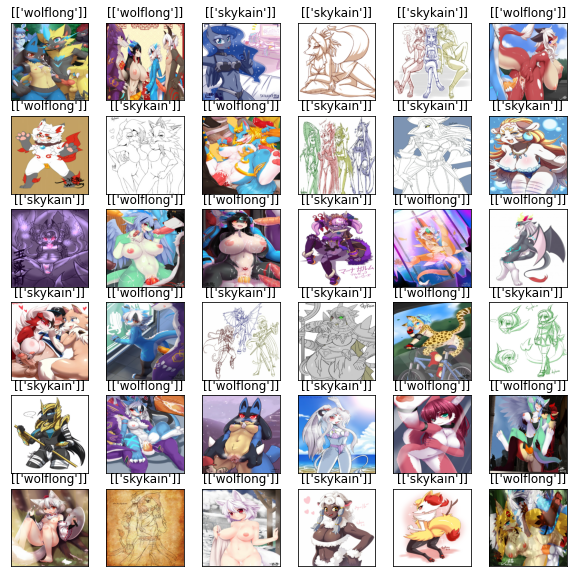

In [16]:
plt.figure(figsize=(10,10))
for i in range(36):

    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(Train_X[i])

    plt.title(ohe.inverse_transform(Train_y[i].reshape(1, -1)))

plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(512,512,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(2,activation='softmax')
])
model._name="A_simple_model_uwu"
model.summary()

Model: "A_simple_model_uwu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 786432)            0         
                                                                 
 dense (Dense)               (None, 64)                50331712  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 50,333,858
Trainable params: 50,333,858
Non-trainable params: 0
_________________________________________________________________


In [18]:
# categorical_crossentropy
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

adam = tf.keras.optimizers.Adam(learning_rate=0.5)

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# fit model to given data
model.fit(Train_X,
          Train_y,
          epochs=60
)

Epoch 1/60
19/19 [==============================] - 4s 177ms/step - loss: 114.9831 - accuracy: 0.5355
Epoch 2/60
19/19 [==============================] - 3s 177ms/step - loss: 26.1716 - accuracy: 0.5587
Epoch 3/60
19/19 [==============================] - 3s 175ms/step - loss: 13.2138 - accuracy: 0.6893
Epoch 4/60
19/19 [==============================] - 3s 175ms/step - loss: 7.2642 - accuracy: 0.6843
Epoch 5/60
19/19 [==============================] - 3s 182ms/step - loss: 14.4208 - accuracy: 0.5752
Epoch 6/60
19/19 [==============================] - 3s 172ms/step - loss: 11.2472 - accuracy: 0.6661
Epoch 7/60
19/19 [==============================] - 3s 181ms/step - loss: 5.7059 - accuracy: 0.7355
Epoch 8/60
19/19 [==============================] - 3s 174ms/step - loss: 7.7198 - accuracy: 0.6430
Epoch 9/60
19/19 [==============================] - 3s 175ms/step - loss: 4.4003 - accuracy: 0.7620
Epoch 10/60
19/19 [==============================] - 3s 178ms/step - loss: 1.2040 - accuracy: 

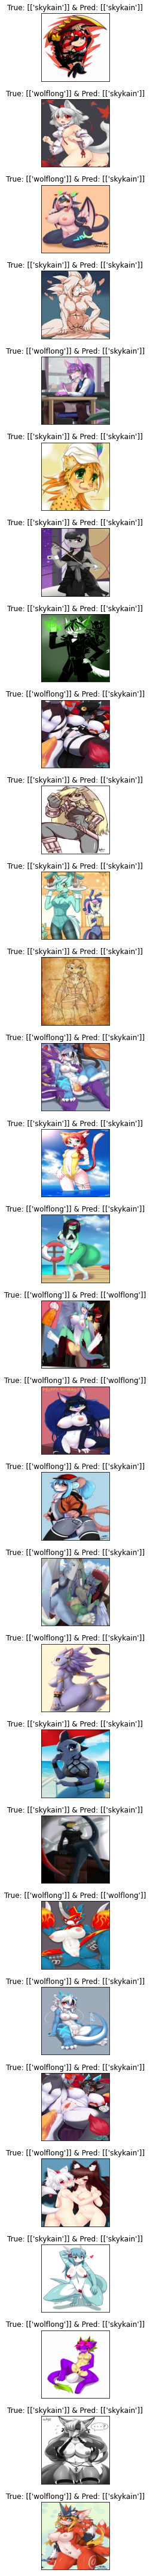

In [20]:
plt.figure(figsize=(20,20*3))
for i in range(30):

    plt.subplot(30,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(Test_X[i])
    img = (np.expand_dims(Test_X[i],0))
    prediction = model.predict(img)
    plt.title("True: {} & Pred: {}".format(
        ohe.inverse_transform(Test_y[i].reshape(1, -1)),
        ohe.inverse_transform(prediction.reshape(1, -1))))
    
    
    
plt.tight_layout()
plt.show()